---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data/fraud_data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [10]:
df.Class.unique()

array([0, 1], dtype=int64)

In [13]:
fruad = len(df[df['Class'] == 1])
not_fraud = len(df[df['Class'] == 0])

fruad_percebtage = (fruad/(fruad+not_fraud))
fruad_percebtage

0.016410823768035772

In [17]:
def answer_one():
    df = pd.read_csv('data/fraud_data.csv')
    fruad = len(df[df['Class'] == 1])
    
    return fruad/len(df)
answer_one()

0.016410823768035772

In [18]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score , accuracy_score

dummy_clf_majority = DummyClassifier(strategy='most_frequent').fit(X_train,
                                                                   y_train)
y_dummy_predicts = dummy_clf_majority.predict(X_test)

acc_score = accuracy_score(y_test , y_dummy_predicts)
recall_score = recall_score(y_test , y_dummy_predicts)

In [24]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_clf_majority = DummyClassifier(strategy='most_frequent').fit(X_train,
                                                                   y_train)
    y_dummy_predicts = dummy_clf_majority.predict(X_test)

    acc_score = accuracy_score(y_test , y_dummy_predicts)
    recall_score = recall_score(y_test , y_dummy_predicts)
    
    return (acc_score,recall_score)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [25]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

svc_clf = SVC().fit(X_train,y_train)
y_svc_predicts = svc_clf.predict(X_test)

acc_score = accuracy_score(y_test , y_svc_predicts)
recall_score = recall_score(y_test , y_svc_predicts)
precision_score = precision_score(y_test , y_svc_predicts)

(acc_score,recall_score,precision_score)

(0.9900442477876106, 0.35, 0.9333333333333333)

In [26]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc_clf = SVC().fit(X_train,y_train)
    y_svc_predicts = svc_clf.predict(X_test)

    acc_score = accuracy_score(y_test , y_svc_predicts)
    recall_score = recall_score(y_test , y_svc_predicts)
    precision_score = precision_score(y_test , y_svc_predicts)
    
    return (acc_score,recall_score,precision_score)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

svc_clf = SVC(C= 1e9 , gamma = 1e-07).fit(X_train,y_train)

# decision_function scores: Predict confidence scores for  each samples,
# '1 = +' and '0 = -' the more the value invreases the more confident it is.
y_svc_confidence = svc_clf.decision_function(X_test)

# THen, we need to set our threshold value to get y =1 (conf>-220) or
# y =0 (conf<-220) accordingly.
y_svc_predicts = np.where(y_svc_confidence > -220, 1, 0)

# finally, after we got the value of y we can get our confusion matrix.
confusion_matrix1 = confusion_matrix(y_test , y_svc_predicts)
confusion_matrix1

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [49]:
# Instead of np.where() we can apply a condition directly to the array , 
# and this's gonna give me array of false or true accordingly. [F=0 ,T=1]
y_svc_confidence = svc_clf.decision_function(X_test) > -220
confusion_matrix2 = confusion_matrix( y_test , y_svc_confidence)
confusion_matrix2

array([[5320,   24],
       [  14,   66]], dtype=int64)

## `numpy.where()` 
The function returns the indices of elements in an input array where the given condition is satisfied.

- The output array contains elements of x where condition is True, and elements from y elsewhere.

In [29]:
# Create a Numpy array from a list
arr = np.array([11, 12, 13, 14])
high_values = ['High', 'High', 'High', 'High']
low_values = ['Low', 'Low', 'Low', 'Low']
# numpy where() with condition argument
result = np.where(arr > 12,
                  ['High', 'High', 'High', 'High'],
                  ['Low', 'Low', 'Low', 'Low'])
print(result)

['Low' 'Low' 'High' 'High']


In [41]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc_clf = SVC(C= 1e9 , gamma = 1e-07).fit(X_train,y_train)

    # decision_function scores: Predict confidence scores for  each samples,
    # '1 = +' and '0 = -' the more the value invreases the more confident it is.
    y_svc_confidence = svc_clf.decision_function(X_test)

    # THen, we need to set our threshold value to get y =1 (conf>-220) or
    # y =0 (conf<-220) accordingly.
    y_svc_predicts = np.where(y_svc_confidence > -220, 1, 0)

    # finally, after we got the value of y we can get our confusion matrix.
    confusion_matrix1 = confusion_matrix(y_test , y_svc_predicts)
    
    return confusion_matrix1

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [83]:
# 0------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams['figure.facecolor'] = '#00000000'

# create & train 
log_reg_clf = LogisticRegression().fit(X_train , y_train)
# get the y predictions
y_log_reg_predicts = log_reg_clf.predict(X_test)
# get the y probability of being 0 & 1.
y_log_reg_proba = log_reg_clf.predict_proba(X_test)
y_fraud_proba = y_log_reg_proba[: ,1] # proba of being 1 only.

y_log_reg_confidence =  log_reg_clf.decision_function(X_test)

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


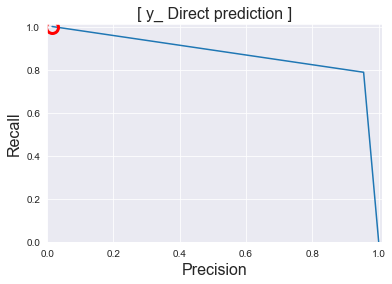

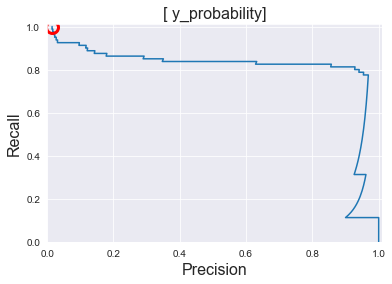

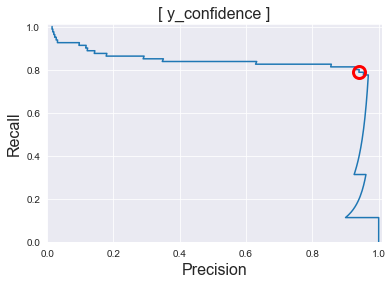

In [84]:
# 1-------------------------------------------------------------------
for i,arr in enumerate([y_log_reg_predicts, y_fraud_proba,y_log_reg_confidence]):
    
    precision, recall, thresholds = precision_recall_curve(y_test, arr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    plt.figure()
    titles = ['[ y_ Direct prediction ]','[ y_probability]','[ y_confidence ]']
    plt.title(titles[i] , fontsize =16)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)

    plt.show();

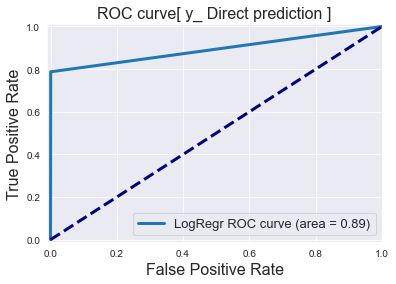

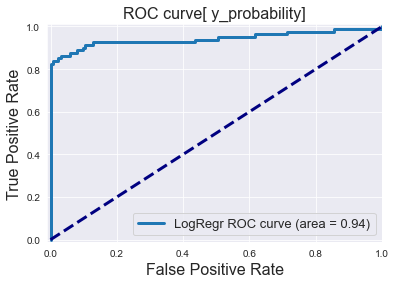

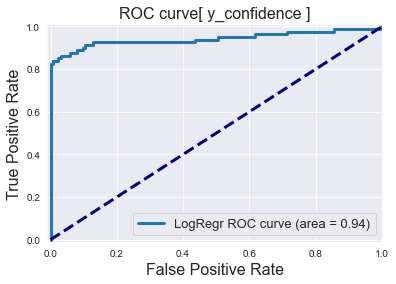

In [85]:
# 2----------------------------------------------------------------
from sklearn.metrics import roc_curve, auc

for i,arr in enumerate([y_log_reg_predicts , y_fraud_proba , y_log_reg_confidence]):
    fpr_lr , tpr_lr , _ =  roc_curve(y_test , arr)
    roc_auc_lr = auc(fpr_lr,tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    titles = ['[ y_ Direct prediction ]','[ y_probability]','[ y_confidence ]']
    plt.title('ROC curve{}'.format(titles[i]), fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.show()

In [87]:
def answer_five():
        return (0.83, 0.94)

answer_five()

(0.83, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=5000).fit(X_train,y_train)
# grid
grid_values = {'penalty': ['l1', 'l2'] , 'C':[0.01, 0.1, 1, 10, 100]}
# let GridSearchCV() know clf,grid values and evalution matrix.
grid_clf_recall = GridSearchCV(clf,grid_values , scoring='recall',cv=3)
# train
grid_clf_recall.fit(X_train,y_train)
# test uning decision function()
y_decision_fn_score_recall = grid_clf_recall.decision_function(X_test)
# 4. get the best grid value with respect to [Accuracy].
print('Grid best parameter(Max. Recall): ',grid_clf_recall.best_params_)
print('Grid best score of acc corresponds to best param above:',
       grid_clf_recall.best_score_)

grid_clf_recall.cv_results_['mean_test_score'].reshape(-1,2)

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Assem Salama\anaconda3\lib\site-

Grid best parameter(Max. Recall):  {'C': 0.1, 'penalty': 'l2'}
Grid best score of acc corresponds to best param above: 0.8079710144927535


array([[       nan, 0.79347826],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101]])

In [99]:
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
grid_lr.fit(X_train, y_train)
result = grid_lr.cv_results_['mean_test_score']
result

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Assem Salama\anaconda3\lib\site-

array([       nan, 0.79701299,        nan, 0.80428571,        nan,
       0.80428571,        nan, 0.80064935,        nan, 0.80064935])

In [100]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
    grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_lr.fit(X_train, y_train)
    result = grid_lr.cv_results_['mean_test_score']
    
    return result

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Assem Salama\anaconda3\lib\site-

<IPython.core.display.Javascript object>


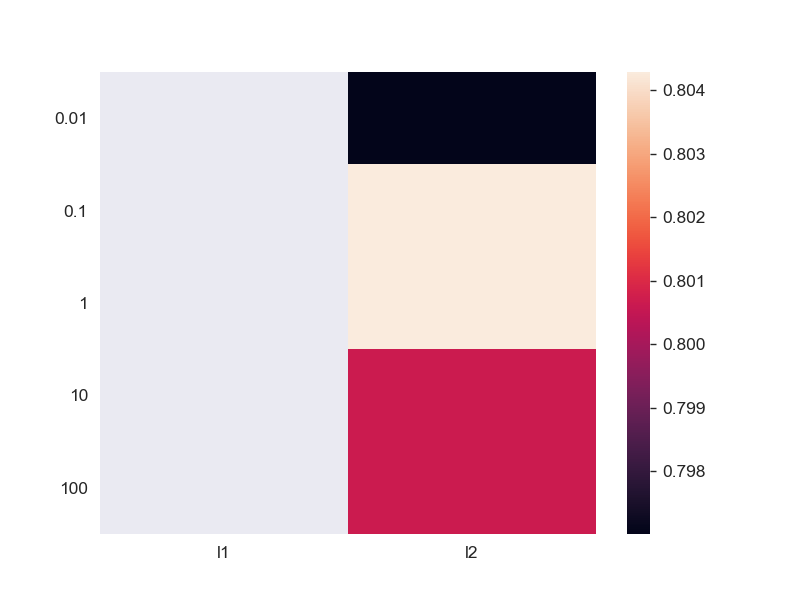

In [101]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())